In [311]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [312]:
df=pd.read_csv("/content/drive/MyDrive/Datasets ML/WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [313]:
df.describe(),df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


(       fixed acidity  volatile acidity  citric acid  residual sugar  \
 count    1143.000000       1143.000000  1143.000000     1143.000000   
 mean        8.311111          0.531339     0.268364        2.532152   
 std         1.747595          0.179633     0.196686        1.355917   
 min         4.600000          0.120000     0.000000        0.900000   
 25%         7.100000          0.392500     0.090000        1.900000   
 50%         7.900000          0.520000     0.250000        2.200000   
 75%         9.100000          0.640000     0.420000        2.600000   
 max        15.900000          1.580000     1.000000       15.500000   
 
          chlorides  free sulfur dioxide  total sulfur dioxide      density  \
 count  1143.000000          1143.000000           1143.000000  1143.000000   
 mean      0.086933            15.615486             45.914698     0.996730   
 std       0.047267            10.250486             32.782130     0.001925   
 min       0.012000             1.

In [314]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


In [315]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

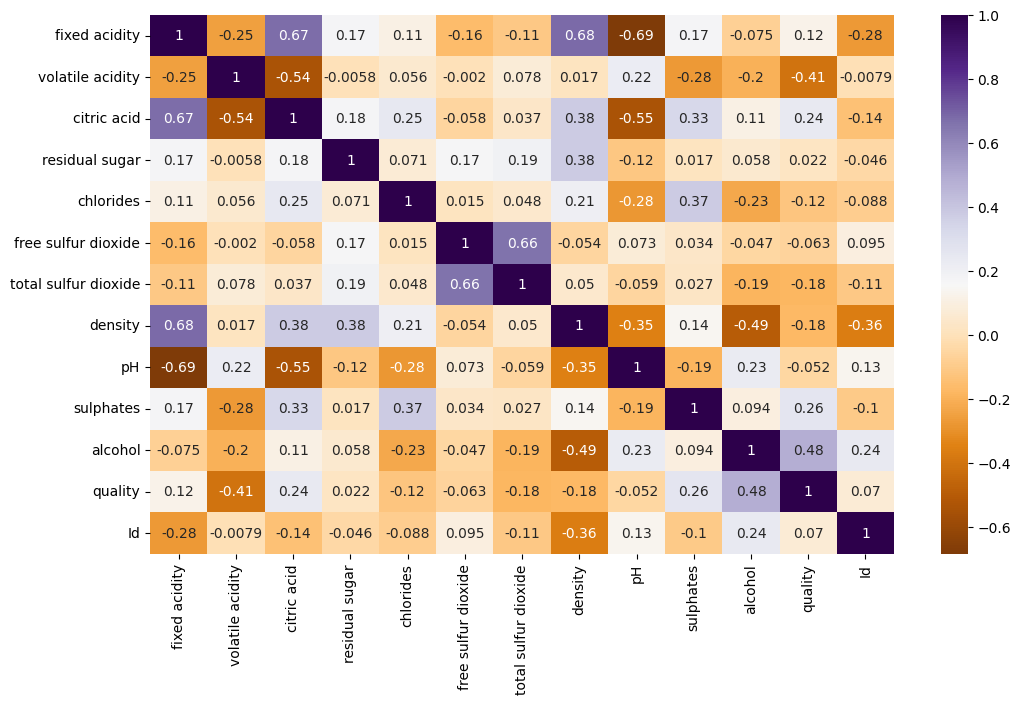

In [316]:
corr = df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr,cmap="PuOr",annot=True)
plt.show()

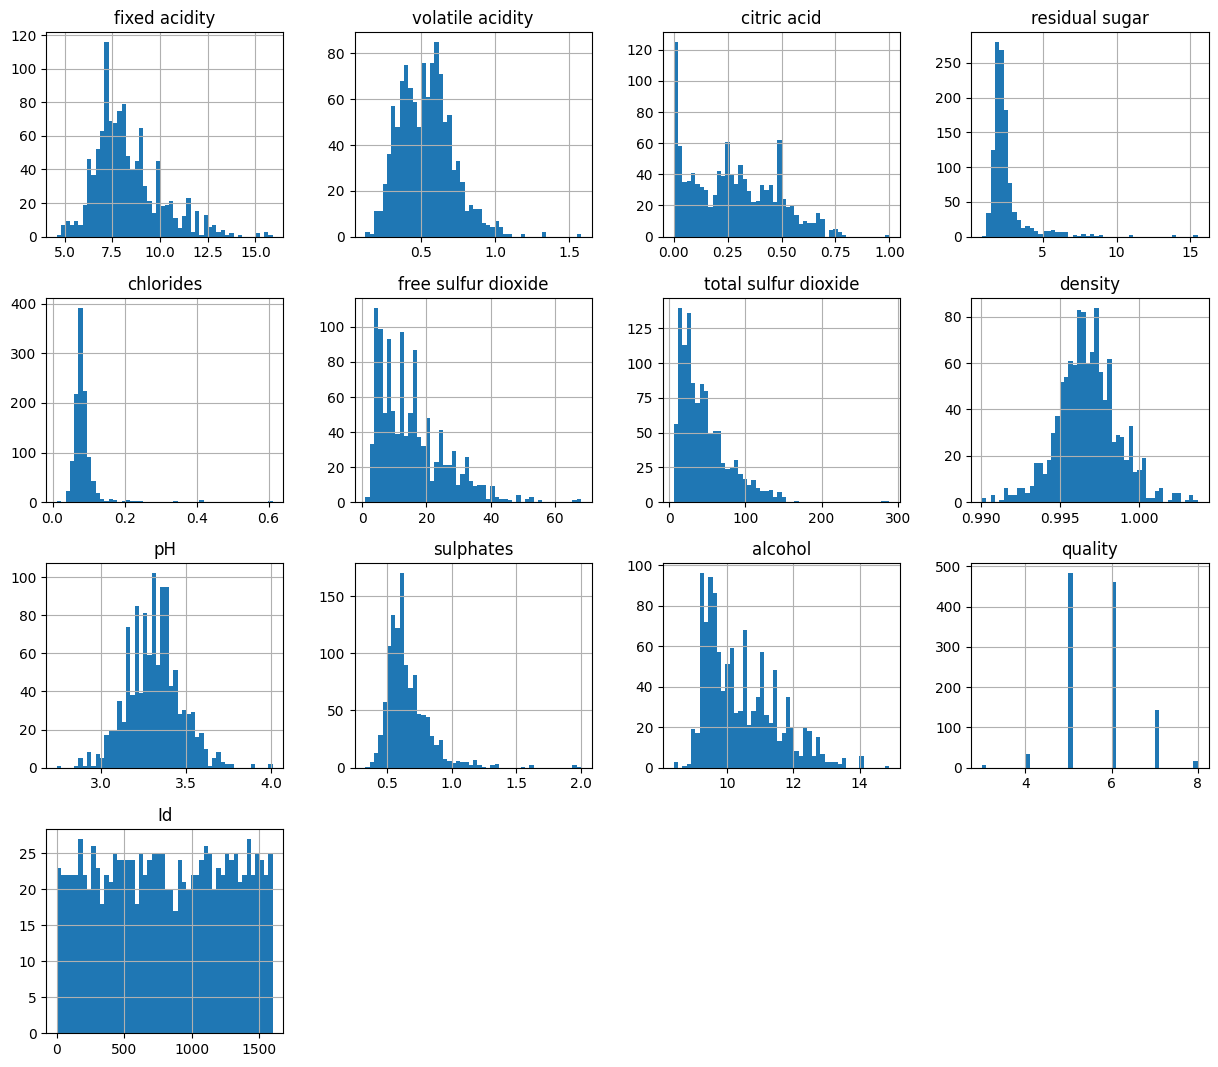

In [317]:
df.hist(figsize=(15,13),bins=50)
plt.show()

In [318]:
x=df.drop(['quality','volatile acidity','chlorides','density'],axis=1).values
y=df['quality'].values
print(x.shape,'\n',y.shape)



(1143, 9) 
 (1143,)


In [319]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=88)

In [320]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [321]:
Y_pred_test=lr.predict(X_test)
Y_pred_train=lr.predict(X_train)

In [322]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('For Test Data')
print('R2 score ',r2_score(Y_test,Y_pred_test))
print(f'Mean Absolute Error : {mean_absolute_error(Y_test,Y_pred_test)}')
print(f"Mean Squared Error : {mean_squared_error(Y_test,Y_pred_test)}")


For Test Data
R2 score  0.33754605828112705
Mean Absolute Error : 0.5370180760311392
Mean Squared Error : 0.4830238096979717


In [323]:
print('For Trained Data')
print('R2 score ',r2_score(Y_train,Y_pred_train))
print(f'Mean Absolute Error : {mean_absolute_error(Y_train,Y_pred_train)}')
print(f"Mean Squared Error : {mean_squared_error(Y_train,Y_pred_train)}")
print(f"Root Mean Squared Error : {np.sqrt(mean_squared_error(Y_train,Y_pred_train))}")
# we got accuracy very less due to less number of data set

For Trained Data
R2 score  0.3042132283677177
Mean Absolute Error : 0.5109054095345138
Mean Squared Error : 0.4322912187736248
Root Mean Squared Error : 0.6574885693102389


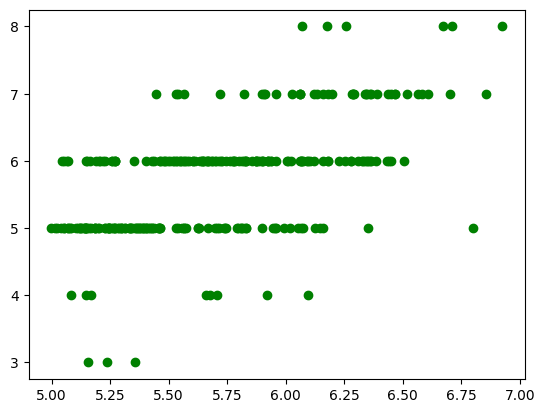

In [324]:
plt.scatter(Y_pred_test,Y_test,color='green')
# print(Y_pred_test,'\n',Y_test)

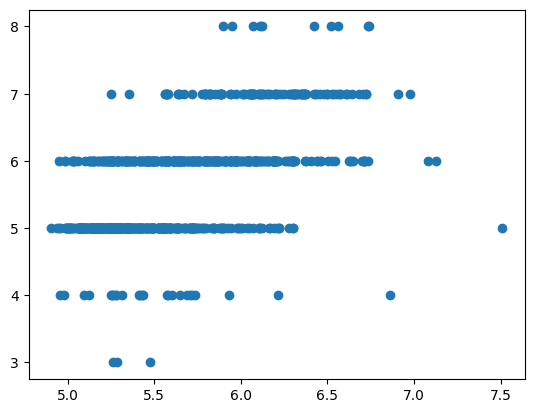

In [325]:
plt.scatter(Y_pred_train,Y_train)

<ipython-input-326-214566aa90ae>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['quality'], bins=30)


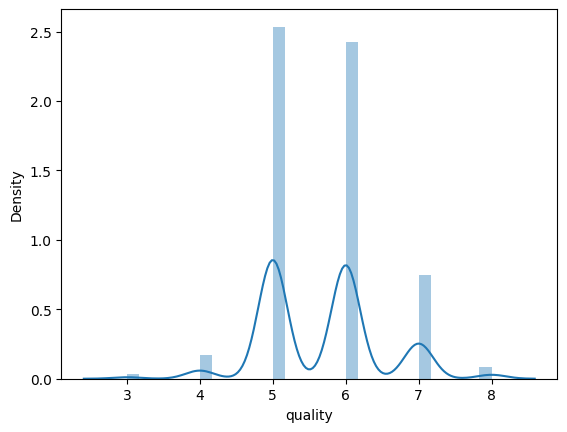

In [326]:
import seaborn as sns
sns.distplot(df['quality'], bins=30)
plt.show()